<h2 align="center">Text Representation Using Bag Of Words (BOW)</h2>

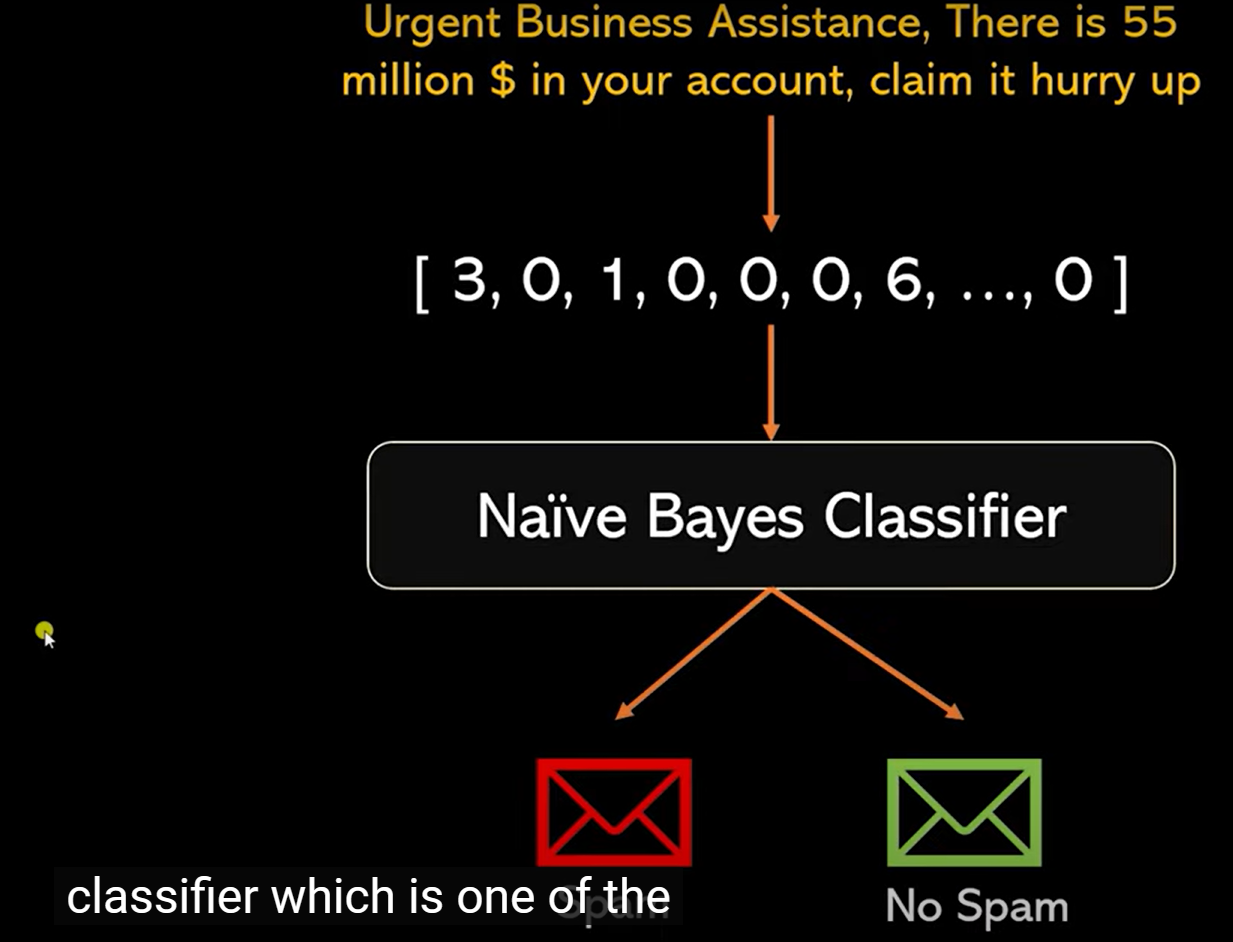

In [1]:
#Buld Vocubulary 1st in all te mails - BOW

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

it's imbalanced dataset

In [5]:
df["spam"] = df.Category.apply(lambda x: 1 if x=="spam" else 0)

In [6]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split

#X: message body
#y = spam

X_train, X_test, y_train, y_test = train_test_split(df["Message"], df["spam"], test_size=0.2)

In [8]:
X_train.shape

(4457,)

In [9]:
X_test.shape

(1115,)

In [10]:
X_train.head()

3006                              Ew are you one of them?
1558                                       Wat r u doing?
4607    Oh... Haha... Den we shld had went today too.....
2105    Anyway seriously hit me up when you're back be...
2804                    FreeMsg>FAV XMAS TONES!Reply REAL
Name: Message, dtype: object

In [11]:
type(X_train)

pandas.core.series.Series

In [16]:
X_train[1]

'Ok lar... Joking wif u oni...'

In [17]:
type(y_train)

pandas.core.series.Series

In [18]:
X_train.values

array(['Ew are you one of them?', 'Wat r u doing?',
       'Oh... Haha... Den we shld had went today too... Gee, nvm la... Kaiez, i dun mind goin jazz oso... Scared hiphop open cant catch up...',
       ..., "Hi di is yijue we're meeting at 7 pm at esaplanade tonight.",
       'Since when, which side, any fever, any vomitin.',
       'Okie.. Thanx..'], dtype=object)

In [19]:
#import countvectorizer for BOW

from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7746 sparse matrix of type '<class 'numpy.int64'>'
	with 59747 stored elements in Compressed Sparse Row format>

In [20]:
X_train_cv_np = X_train_cv.toarray()
X_train_cv_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
v.get_feature_names_out()[1:20]

array(['000', '000pes', '008704050406', '0089', '0121', '01223585236',
       '01223585334', '0125698789', '02', '0207', '02072069400',
       '02073162414', '02085076972', '021', '03', '04', '0430', '05',
       '0578'], dtype=object)

In [22]:
v.get_feature_names_out().shape

(7746,)

In [23]:
v.vocabulary_

{'ew': 2696,
 'are': 1040,
 'you': 7710,
 'one': 4952,
 'of': 4904,
 'them': 6841,
 'wat': 7403,
 'doing': 2402,
 'oh': 4922,
 'haha': 3313,
 'den': 2252,
 'we': 7424,
 'shld': 6115,
 'had': 3311,
 'went': 7463,
 'today': 6952,
 'too': 6984,
 'gee': 3112,
 'nvm': 4876,
 'la': 4017,
 'kaiez': 3915,
 'dun': 2491,
 'mind': 4504,
 'goin': 3186,
 'jazz': 3831,
 'oso': 5010,
 'scared': 5942,
 'hiphop': 3459,
 'open': 4966,
 'cant': 1649,
 'catch': 1692,
 'up': 7194,
 'anyway': 995,
 'seriously': 6041,
 'hit': 3462,
 'me': 4429,
 'when': 7485,
 're': 5601,
 'back': 1194,
 'because': 1286,
 'otherwise': 5014,
 'have': 3374,
 'to': 6946,
 'light': 4143,
 'with': 7555,
 'armand': 1057,
 'and': 950,
 'he': 3384,
 'always': 923,
 'has': 3360,
 'shit': 6109,
 'or': 4985,
 'is': 3771,
 'vomiting': 7332,
 'freemsg': 3001,
 'fav': 2796,
 'xmas': 7653,
 'tones': 6975,
 'reply': 5731,
 'real': 5613,
 'hard': 3352,
 'but': 1581,
 'true': 7063,
 'how': 3543,
 'much': 4653,
 'show': 6141,
 'amp': 939,
 'ex

In [24]:
X_train_cv_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
np.where(X_train_cv_np[0]!=0)

(array([1040, 2696, 4904, 4952, 6841, 7710], dtype=int64),)

In [26]:
v.get_feature_names_out()[846]

'afternoon'

In [27]:
v.get_feature_names_out()[1185]

'babe'

In [28]:
v.get_feature_names_out()[1561]

'building'

In [29]:
v.get_feature_names_out()[4883]

'nytho'

In [33]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [35]:
X_test_cv = v.transform(X_test)

In [37]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.98      0.92      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Used `f1 score` as class is imablanced

In [38]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [39]:
##using Pipeline
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])

In [40]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [41]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.98      0.92      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

